# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
driver = webdriver.Chrome()

url = "https://etherscan.io/txs"

driver.get(url)

In [8]:
def extract_html_content(driver):
    body = driver.find_element(By.TAG_NAME,"tbody")
    html_content=body.get_attribute("innerHTML")
    soup = BeautifulSoup(html_content, "html.parser")
    return soup.find_all("tr")

In [9]:
def extract_attributes(item):
    return {
            "txn Hash": item.find("span", class_="hash-tag").text.strip(),
            "Method": item.find("span", class_="badge").text.strip(),
            "Block": item.find_all("td")[3].text.strip(),
            "Age": item.find("td", class_="showAge").text.strip(),
            "Sender": item.find_all("td")[7].text.strip(),
            "Receiver": item.find_all("td")[9].text.strip(),
            "Value": item.find_all("td")[10].text.strip(),
            "Txn Fee": item.find_all("td", class_="small text-muted showTxnFee")[0].text.strip()
    }

In [10]:
all_data = []
page_number=0
while(page_number<50):
    tr=extract_html_content(driver)
    for item in tr:    
        all_data.append(extract_attributes(item))
    next_page = driver.find_element(By.XPATH, '//a[@class="page-link px-3" and @aria-label="Next"]')  # Locate the next page link
    next_page.click()
    page_number+=1

df = pd.DataFrame(all_data)
driver.close()


In [11]:
first_10_blocks = df["Block"].drop_duplicates().head(10)
filtered_df = df[df["Block"].isin(first_10_blocks)].drop_duplicates(subset="txn Hash", keep="first")
filtered_df

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee
0,0x41c2245c49be03eea03c1ff459efa7d5452ffad4bba8...,Transfer,19382708,10 secs ago,beaverbuild,0x12524093...a14204fD6,0.068786521 ETH,0.00117377
1,0xad1791bd28d3d2f0c65f00c1025afd2d63bcfc219abd...,Transfer,19382708,10 secs ago,0x0c9aFafE...5707dfBaD,Circle: USDC Token,0 ETH,0.00233729
2,0x2b31d21fccf2157b03e7481900402c91de6b82fb2cea...,Transfer,19382708,10 secs ago,0x6cc24E54...222aBdB31,Chainlink: LINK Token,0 ETH,0.00174776
3,0xc5cfc8eab480c7b6df608abaa86429617855c886d33e...,Transfer,19382708,10 secs ago,0xEE0CB41F...130DcDB97,0x9f43F388...5d8029b1a,0 ETH,0.00315218
4,0x7b156332f0635af688820c2b65863f17383979f60e3d...,Transfer,19382708,10 secs ago,0xf16C5245...dB59F8fAa,0x7997EAF4...274789a6C,0.004544305 ETH,0.00117379
...,...,...,...,...,...,...,...,...
2395,0xc6be35f66fd25d9b56c5a8cb71877d878c028a6f7160...,Transfer,19382707,2 mins ago,0x8a37F029...128Fd0712,0x731A800A...2390781eA,0.003352713 ETH,0.00116005
2396,0x999810ca80838847113f0faa6d41ecfde5e1196cd9bc...,Transfer,19382707,2 mins ago,0x1440ec79...5b6003f9e,Tether: USDT Stablecoin,0 ETH,0.00349353
2397,0x6b8d41d7e0c45032f7ef798f62179fdfd54329eae490...,Approve,19382707,2 mins ago,0xdFc80f5C...836806cb6,0x72f713D1...6688D218d,0 ETH,0.00263279
2398,0x57fcee14e59f839d6064932819581b3432c481137546...,Transfer,19382707,2 mins ago,0xDd5e7204...43827795a,0x44398b18...c4db80995,0.2752925 ETH,0.001176


In [12]:
backup_df = df.copy(deep=True)
df.dtypes

txn Hash    object
Method      object
Block       object
Age         object
Sender      object
Receiver    object
Value       object
Txn Fee     object
dtype: object

In [93]:
df = backup_df.copy(deep=True)

In [68]:
def print_unique_elements(df, column_name):
    try:
        unique_counts = df[column_name].value_counts()
        i = 0 
        for value, count in unique_counts.items():
            i = i + 1 
            print(f"{value} Count: {count}")
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")

In [54]:
print_unique_elements(df, "Method")

1 : Element: Transfer, Count: 913
2 : Element: Execute, Count: 76
3 : Element: Sell To Uniswap, Count: 8
4 : Element: 0x6e20b107, Count: 8
5 : Element: Purchase Token W..., Count: 8
6 : Element: Deposit, Count: 8
7 : Element: Sell Eth For Tok..., Count: 7
8 : Element: 0x9871efa4, Count: 6
9 : Element: Deposit Transact..., Count: 6
10 : Element: 0x0162e2d0, Count: 6
11 : Element: Transfer*, Count: 6
12 : Element: Buy With ETH Wer..., Count: 5
13 : Element: Swap, Count: 4
14 : Element: Bridge And Call, Count: 4
15 : Element: 0xcba9bc66, Count: 3
16 : Element: 0x2b2f5c1d, Count: 3
17 : Element: 0x2b313f01, Count: 3
18 : Element: Swap Tokens Gene..., Count: 2
19 : Element: 0xbba64976, Count: 2
20 : Element: Swap Exact ETH F..., Count: 2
21 : Element: Eth Unoswap, Count: 2
22 : Element: Exact Input Sing..., Count: 2
23 : Element: 0x2b662120, Count: 2
24 : Element: Aggregate, Count: 2
25 : Element: 0x2b602120, Count: 2
26 : Element: Make Bid, Count: 2
27 : Element: Exact Input, Count: 2
28 :

In [55]:
print_unique_elements(df,"Age")

1 : Element: 1 min ago, Count: 481
2 : Element: 2 mins ago, Count: 236
3 : Element: 16 secs ago, Count: 56
4 : Element: 26 secs ago, Count: 34
5 : Element: 30 secs ago, Count: 33
6 : Element: 49 secs ago, Count: 33
7 : Element: 11 secs ago, Count: 25
8 : Element: 48 secs ago, Count: 25
9 : Element: 10 secs ago, Count: 24
10 : Element: 31 secs ago, Count: 23
11 : Element: 32 secs ago, Count: 22
12 : Element: 27 secs ago, Count: 21
13 : Element: 50 secs ago, Count: 19
14 : Element: 45 secs ago, Count: 17
15 : Element: 17 secs ago, Count: 15
16 : Element: 46 secs ago, Count: 15
17 : Element: 25 secs ago, Count: 13
18 : Element: 13 secs ago, Count: 13
19 : Element: 29 secs ago, Count: 8
20 : Element: 44 secs ago, Count: 8


In [56]:
print_unique_elements(df,"Block")

1 : Element: 19382711, Count: 221
2 : Element: 19382710, Count: 198
3 : Element: 19382708, Count: 155
4 : Element: 19382713, Count: 154
5 : Element: 19382712, Count: 117
6 : Element: 19382707, Count: 105
7 : Element: 19382709, Count: 92
8 : Element: 19382714, Count: 79


In [69]:
print_unique_elements(df,"Txn Fee")

0.00121274 Count: 80
0.00121577 Count: 62
0.00117443 Count: 58
0.00114955 Count: 46
0.0012401 Count: 39
0.00115844 Count: 34
0.00116412 Count: 25
0.00120673 Count: 24
0.00115343 Count: 24
0.00118573 Count: 24
0.00117165 Count: 24
0.00112855 Count: 23
0.00119174 Count: 18
0.00116561 Count: 16
0.001302 Count: 15
0.001134 Count: 13
0.00117468 Count: 12
0.00117397 Count: 12
0.00117445 Count: 12
0.00116494 Count: 10
0.00113744 Count: 10
0.00113334 Count: 8
0.00122773 Count: 8
0.00117566 Count: 8
0.001239 Count: 8
0.0012191 Count: 7
0.00110846 Count: 7
0.00119902 Count: 7
0.00119102 Count: 6
0.00119477 Count: 6
0.00116662 Count: 6
0.00117284 Count: 6
0.00113245 Count: 6
0.00131815 Count: 6
0.00113263 Count: 5
0.00115846 Count: 5
0.00681325 Count: 5
0.00145453 Count: 4
0.00122831 Count: 4
0.00122742 Count: 4
0.00111732 Count: 4
0.00117691 Count: 4
0.00119623 Count: 4
0.00113432 Count: 4
0.00116767 Count: 4
0.00116414 Count: 4
0.01680653 Count: 3
0.00128725 Count: 3
0.01154389 Count: 3
0.00123

In [95]:
#df = df[df['Value'] != "0 ETH"]
print_unique_elements(df,"Value")

0.04 ETH Count: 103
1 ETH Count: 21
0.01 ETH Count: 19
0.05 ETH Count: 11
0.3 ETH Count: 11
0.02 ETH Count: 9
0.5 ETH Count: 8
0.24 ETH Count: 6
183 wei Count: 6
0.06 ETH Count: 6
0.135 ETH Count: 5
0.13 ETH Count: 5
0.027 ETH Count: 5
0.15 ETH Count: 5
186 wei Count: 4
0.2 ETH Count: 4
0.00264 ETH Count: 4
0.0116 ETH Count: 4
0.03 ETH Count: 4
0.013259663 ETH Count: 4
0.48 ETH Count: 4
0.07 ETH Count: 4
0.005353275 ETH Count: 3
0.046767 ETH Count: 3
0.043437576 ETH Count: 3
0.045437576 ETH Count: 3
0.06733681 ETH Count: 3
0.19357476 ETH Count: 3
0.01726445 ETH Count: 3
0.005076514 ETH Count: 3
0.00487558 ETH Count: 3
1.598672775 ETH Count: 3
1.628431186 ETH Count: 3
0.201455417 ETH Count: 3
0.00713477 ETH Count: 3
2.8004 ETH Count: 3
0.128738 ETH Count: 3
0.0025 ETH Count: 3
0.011469 ETH Count: 3
0.091 ETH Count: 3
0.00730551 ETH Count: 3
0.118 ETH Count: 3
0.028 ETH Count: 3
0.055161494 ETH Count: 3
2.595371117 ETH Count: 3
0.409888391 ETH Count: 3
0.0014 ETH Count: 3
0.00822 ETH Cou

In [96]:
def convert_to_eth(value):
    try:
        if "wei" in value:
            # Convert wei to ETH
            wei_value = float(value.replace(" wei", ""))
            eth_value = wei_value / 1e18  # Divide by 10^18
        else:
            # Assume it's already in ETH format
            eth_value = float(value.replace(" ETH", ""))
        return eth_value
    except ValueError:
        # Handle any conversion errors (e.g., invalid input)
        return np.nan

df['Value'] = df['Value'].apply(convert_to_eth)
print_unique_elements(df,"Value")

0.04 Count: 103
1.0 Count: 21
0.01 Count: 19
0.05 Count: 11
0.3 Count: 11
0.02 Count: 9
0.5 Count: 8
0.24 Count: 6
1.83e-16 Count: 6
0.06 Count: 6
0.135 Count: 5
0.13 Count: 5
0.027 Count: 5
0.15 Count: 5
1.86e-16 Count: 4
0.2 Count: 4
0.00264 Count: 4
0.0116 Count: 4
0.03 Count: 4
0.013259663 Count: 4
0.48 Count: 4
0.07 Count: 4
0.005353275 Count: 3
0.046767 Count: 3
0.043437576 Count: 3
0.045437576 Count: 3
0.06733681 Count: 3
0.19357476 Count: 3
0.01726445 Count: 3
0.005076514 Count: 3
0.00487558 Count: 3
1.598672775 Count: 3
1.628431186 Count: 3
0.201455417 Count: 3
0.00713477 Count: 3
2.8004 Count: 3
0.128738 Count: 3
0.0025 Count: 3
0.011469 Count: 3
0.091 Count: 3
0.00730551 Count: 3
0.118 Count: 3
0.028 Count: 3
0.055161494 Count: 3
2.595371117 Count: 3
0.409888391 Count: 3
0.0014 Count: 3
0.00822 Count: 3
0.052603477 Count: 3
0.38 Count: 3
1.2 Count: 3
0.019161425 Count: 3
1.626 Count: 3
0.2963 Count: 3
0.91 Count: 3
0.74820626 Count: 3
0.002368378 Count: 3
0.12 Count: 3
0.025

In [59]:
def calculate_mean_and_std(df, column_name):
    try:
        column_mean = df[column_name].mean()
        column_std = df[column_name].std()
        return column_mean, column_std
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return np.nan, np.nan

In [98]:
df["Txn Fee"] = df["Txn Fee"].astype(float)

In [61]:
mean_value, std_value = calculate_mean_and_std(df, "Value")
mean_fee, std_fee = calculate_mean_and_std(df, "Txn Fee")

In [62]:
print(f"Value mean = {mean_value} \nValue std = {std_value} \nfee mean = {mean_fee} \nfee std = {std_fee}")

Value mean = 2.416188804373774 
Value std = 19.19412533735311 
fee mean = 0.002750336966993756 
fee std = 0.004696958339387301


In [115]:
from scipy.stats import norm

def plot_histogram_and_kde(df, column_name):
    try:
        sns.set(style="whitegrid")

        # Plot histogram with wider bars (adjust binwidth as needed)
        sns.histplot(df[column_name], bins='auto', color='skyblue', edgecolor='black', binwidth=0.002)

        # Calculate mean and standard deviation
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()

        # Generate values for the normal distribution
        x_values = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
        y_values = norm.pdf(x_values, mean_value, std_value)

        # Overlay Gaussian distribution (KDE)
        plt.plot(x_values, y_values, color='red', label='Gaussian KDE')

        max_count = df[column_name].value_counts().max()

        # Set y-axis limit to the maximum count
        #plt.ylim(0, max_count)

        # Customize x-axis limits (adjust as needed)
        #plt.xlim(min(df[column_name]), max(df[column_name]))

        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.title(f"Distribution of {column_name} with Gaussian KDE", fontsize=14)

        plt.legend()  # Show legend for Gaussian KDE

        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_histogram_and_kde2(df, column_name , bins_count):
    try:
        sns.set(style="whitegrid")

        # Plot histogram with wider bars (adjust binwidth as needed)
        sns.histplot(df[column_name], bins=bins_count, color='skyblue', edgecolor='black', binwidth='auto')

        # Calculate mean and standard deviation
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()

        # Generate values for the normal distribution
        x_values = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
        y_values = norm.pdf(x_values, mean_value, std_value)

        # Overlay Gaussian distribution (KDE)
        plt.plot(x_values, y_values, color='red', label='Gaussian KDE')

        max_count = df[column_name].value_counts().max()

        # Set y-axis limit to the maximum count
        plt.ylim(0, max_count)

        # Customize x-axis limits (adjust as needed)
        plt.xlim(min(df[column_name]), max(df[column_name]))

        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.title(f"Distribution of {column_name} with Gaussian KDE", fontsize=14)

        plt.legend()  # Show legend for Gaussian KDE

        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_box_plot(df, column_name):
    try:
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.xlabel(column_name)
        plt.title(f"Box Plot: {column_name}")
        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_scatter(df, x_column, y_column):
    try:
        plt.scatter(df[x_column], df[y_column], alpha=0.5, color='purple')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f"Scatter Plot: {x_column} vs. {y_column}")
        plt.show()
    except KeyError:
        print(f"Column '{x_column}' or '{y_column}' not found in the DataFrame.")

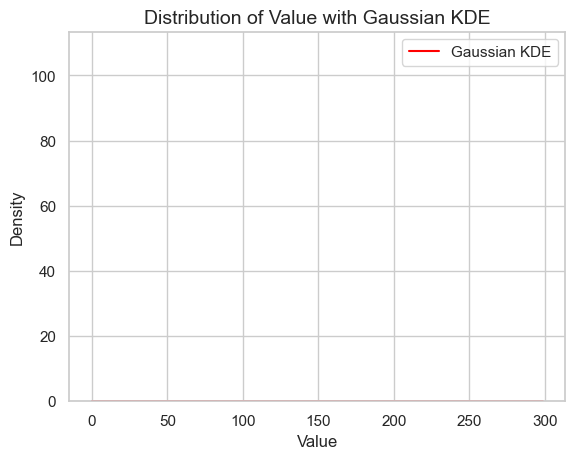

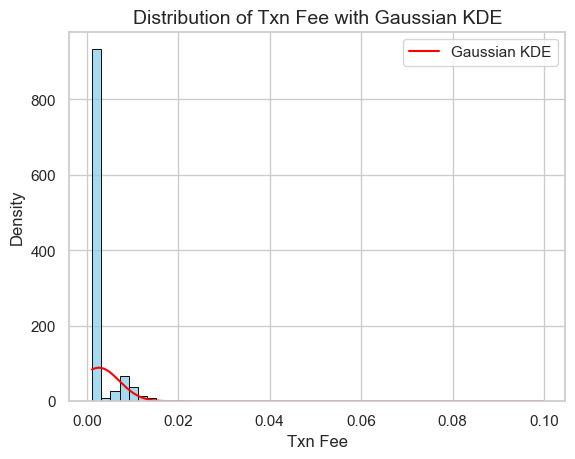

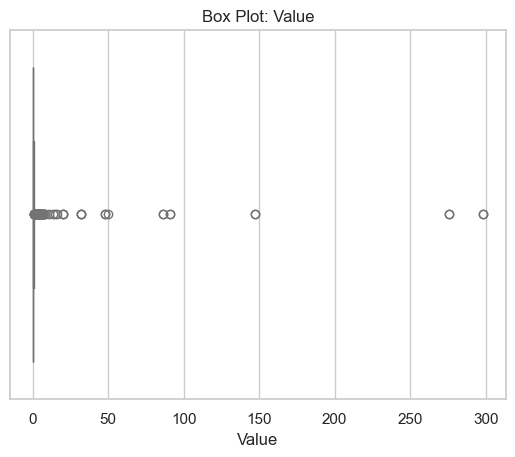

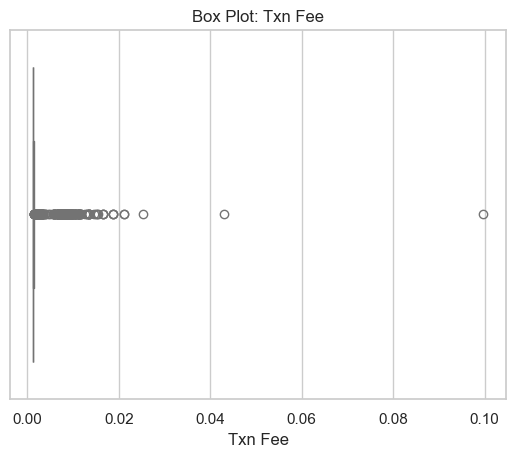

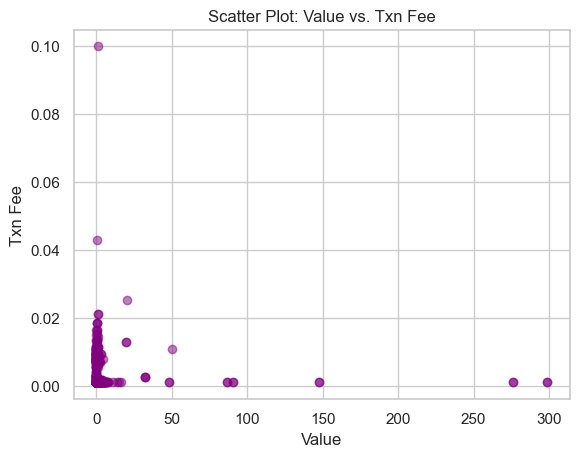

In [116]:
plot_histogram_and_kde(df , "Value")
plot_histogram_and_kde(df , "Txn Fee")
plot_box_plot(df , "Value")
plot_box_plot(df , "Txn Fee")
plot_scatter(df , "Value" , "Txn Fee")

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [2]:
# Your code here

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

In [1]:
# Your code here

In [76]:
df.to_csv('my_dataframe.csv', index=False)